In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# very important to include this module - this is what was causing error
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# check do we have the config.py set up correctly and linked into this notebook? 
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

In [2]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
# Also I already added the ViewJSON extension to my Chrome Browser

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
# make sure to reset the kernel and clear output before uploading this notebook or comment out the print statements
city_url = url + "&q=" + "cabo"

# Cabo and Cabo+San+Lucas are two different cities- Cabo alone brings up Cabo De Santo Augustinho in Brazil pop 208,000
# Remenber to remove or comment out the actual URL which includes the key so it is not displayed as open text
# print(city_url)

In [3]:
# Create a set of random latitude and longitude combinations.
# I think -90 to 90 is too likely to pick a non populated area
# Even using -60 to 70 you are going to get some extremely remote locations, most over water 
# adjust the max size to lower than 500 for the purpose of testing and increase to 1500 when ready
maxsize = 995
lats = np.random.uniform(low=-55.000, high=72.000, size=maxsize)
lngs = np.random.uniform(low=-180.000, high=180.000, size=maxsize)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# this list() function does not seem to work.  Should it be preceded with pd.list() or some other class object? 
# no it just seems to be the size.  it doesn't like maxsize=650 or higher - it works when maxsize <= 650
newlats = list(lat_lngs)
# newlats
#for lat_lng in lat_lngs:
#    print(lat_lng[0], lat_lng[1])
len(newlats)

995

In [5]:
# Add the latitudes and longitudes to a list.
# coordinates = list(lat_lngs)
# len(coordinates)

# this fails because you only get to unzip ONCE
#so how about if I just assignthe newlats to a new variable name ? 
coordinates = newlats
len(coordinates)

995

In [6]:
# I have 995 coords so far, but not many in USA - I want to do a second batch of just USA coords

# first test my city to pick some USA cities and get the data for them 
my_city = citipy.nearest_city(40.1, -96.2).city_name
my_country = citipy.nearest_city(40.1, -96.2).country_code
print(my_city, my_country)

my_lats = np.random.uniform(low=24.000, high=49.000, size=100)
# US lng ranes from -124 WA to -66.0 Maine
my_lngs = np.random.uniform(low=-125.000, high=-65.000, size=100)
my_lngs


beatrice us


array([-122.78993501, -124.96151999,  -88.75560634,  -75.35611702,
        -84.41141517, -110.43021969,  -82.09245409,  -73.71679409,
       -120.40338175, -123.00253236, -116.23038483,  -93.47866771,
        -71.52716652,  -90.09097502, -122.5551447 ,  -78.8910498 ,
        -69.64328118, -120.94635624,  -98.01182711,  -72.68372296,
        -89.47741707,  -97.03106603,  -72.44013234,  -96.79027291,
       -102.85506669, -103.7862288 ,  -91.9622633 , -112.20890174,
       -101.46977247, -111.01002997,  -90.39721955,  -93.54191591,
        -79.24006609,  -74.28502357, -124.0433359 ,  -67.68740242,
       -123.85936225,  -90.97709258,  -66.8617349 ,  -75.55204532,
       -117.98551318,  -92.02693147,  -81.5886739 ,  -71.48843574,
        -93.67608762, -119.34279265,  -71.59325224, -110.53217077,
        -95.95862994, -104.59752305,  -79.56833963,  -81.84017096,
        -83.1647155 ,  -67.35335373, -118.9335274 ,  -83.83835599,
        -83.82354268, -123.1540532 , -109.43783549,  -90.94589

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# len(cities)
cities

['ribeira grande',
 'kemijarvi',
 'vostok',
 'atuona',
 'mataura',
 'victoria',
 'kysyl-syr',
 'nikolskoye',
 'ushuaia',
 'marzuq',
 'isangel',
 'kavieng',
 'hualmay',
 'saleaula',
 'alegrete',
 'cockburn town',
 'hilo',
 'mandalgovi',
 'general teran',
 'butaritari',
 'santa cruz',
 'rikitea',
 'coquimbo',
 'mundo nuevo',
 'vrangel',
 'dargaville',
 'hithadhoo',
 'bethel',
 'sur',
 'santa rosa',
 'punta arenas',
 'hamilton',
 'hue',
 'carnarvon',
 'krasnoselkup',
 'lasa',
 'beroroha',
 'matagami',
 'tasiilaq',
 'chiredzi',
 'bredasdorp',
 'vardo',
 'severo-kurilsk',
 'port blair',
 'pemangkat',
 'denpasar',
 'skagen',
 'wilmington',
 'anadyr',
 'pangnirtung',
 'mugla',
 'marana',
 'jamestown',
 'qaqortoq',
 'pisco',
 'kununurra',
 'okha',
 'san cristobal',
 'beringovskiy',
 'puerto ayora',
 'san quintin',
 'campbell river',
 'halalo',
 'norman wells',
 'plered',
 'kaeo',
 'mar del plata',
 'castro',
 'hambantota',
 'powell river',
 'jalingo',
 'baeza',
 'kruisfontein',
 'vaini',
 'mab

In [8]:
# okay so we have more than 500 cities but should we eliminate some with low populations? can we get population data? 
# why did this work in API_practice but not in the main notebook?  still a mystery
# I already know the nearest_city function only shows cities with population > 5000 people
# but honestly who is going to Northwest Territories in Canada for a vacation?
# also what about cities where there are more that one with the same name like wilmington or springfield ? 
len(cities)

555

In [9]:
# This is where the data import code begins in section 6.2.6
# Must be sure to import requests module at the top of the notebook for any of this to work max

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        if (city_lat < -54):
            print(city.title())
        if (city_lat > 64):
            print(city.title())

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | kemijarvi
Kemijarvi
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | kysyl-syr
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | ushuaia
Ushuaia
Processing Record 10 of Set 1 | marzuq
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | alegrete
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | mandalgovi
Processing Record 19 of Set 1 | general teran
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | santa cruz
Processing Record 22 of Set 1 |

Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | galesong
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | maniitsoq
Maniitsoq
Processing Record 44 of Set 4 | atambua
Processing Record 45 of Set 4 | burnie
Processing Record 46 of Set 4 | satitoa
City not found. Skipping...
Processing Record 47 of Set 4 | hegra
Processing Record 48 of Set 4 | seoul
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | provideniya
Provideniya
Processing Record 1 of Set 5 | nome
Nome
Processing Record 2 of Set 5 | iquique
Processing Record 3 of Set 5 | le moule
Processing Record 4 of Set 5 | chara
Processing Record 5 of Set 5 | tabuk
Processing Record 6 of Set 5 | santa isabel do rio negro
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | mujiayingzi
Processing Record 9 of Set 5 | comodoro rivadavia
Processing Record 10 of Set 5 | san carlos del zulia
Processing Record 11

Processing Record 23 of Set 8 | westpunt
City not found. Skipping...
Processing Record 24 of Set 8 | abashiri
Processing Record 25 of Set 8 | swinoujscie
Processing Record 26 of Set 8 | mount pleasant
Processing Record 27 of Set 8 | freeport
Processing Record 28 of Set 8 | giresun
Processing Record 29 of Set 8 | north bend
Processing Record 30 of Set 8 | sulechow
Processing Record 31 of Set 8 | crateus
Processing Record 32 of Set 8 | pasighat
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | umm lajj
Processing Record 35 of Set 8 | alotau
City not found. Skipping...
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 38 of Set 8 | mariental
Processing Record 39 of Set 8 | talnakh
Talnakh
Processing Record 40 of Set 8 | itarema
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | axams
Processing Record 43 of Set 8 | orlik
Processing Record 

-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# total cities processed = 443 so now what do we do? 

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,79.20,53,40,10.36,PT,2021-07-29 18:39:30
1,Kemijarvi,66.7131,27.4306,53.78,79,95,8.25,FI,2021-07-29 18:39:30
2,Vostok,46.4856,135.8833,65.98,97,84,2.77,RU,2021-07-29 18:39:30
3,Atuona,-9.8000,-139.0333,77.40,76,28,11.83,PF,2021-07-29 18:39:31
4,Mataura,-46.1927,168.8643,39.47,94,87,3.89,NZ,2021-07-29 18:39:31
5,Victoria,22.2855,114.1577,86.38,87,100,1.99,HK,2021-07-29 18:37:56
6,Kysyl-Syr,63.8986,122.7617,52.48,56,73,2.06,RU,2021-07-29 18:39:31
7,Nikolskoye,59.7035,30.7861,71.49,83,32,3.02,RU,2021-07-29 18:39:32
8,Ushuaia,-54.8000,-68.3000,47.86,34,20,24.16,AR,2021-07-29 18:39:32
9,Marzuq,14.4000,46.4667,78.15,67,100,7.14,YE,2021-07-29 18:39:32


In [11]:
print("Min and Max latitude of cities in this sample")
max_lat = city_data_df["Lat"].max()
print(city_data_df["Lat"].min(), city_data_df["Lat"].max())
print("Total number of cities in this run")
print(city_data_df["Lat"].count())

Min and Max latitude of cities in this sample
-54.8 71.9667
Total number of cities in this run
511


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness","Wind Speed"]
# new_df = city_data_df[new_column_order]
# new_df.head(20)
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-07-29 18:39:30,38.5167,-28.7000,79.20,53,40,10.36
1,Kemijarvi,FI,2021-07-29 18:39:30,66.7131,27.4306,53.78,79,95,8.25
2,Vostok,RU,2021-07-29 18:39:30,46.4856,135.8833,65.98,97,84,2.77
3,Atuona,PF,2021-07-29 18:39:31,-9.8000,-139.0333,77.40,76,28,11.83
4,Mataura,NZ,2021-07-29 18:39:31,-46.1927,168.8643,39.47,94,87,3.89
5,Victoria,HK,2021-07-29 18:37:56,22.2855,114.1577,86.38,87,100,1.99
6,Kysyl-Syr,RU,2021-07-29 18:39:31,63.8986,122.7617,52.48,56,73,2.06
7,Nikolskoye,RU,2021-07-29 18:39:32,59.7035,30.7861,71.49,83,32,3.02
8,Ushuaia,AR,2021-07-29 18:39:32,-54.8000,-68.3000,47.86,34,20,24.16
9,Marzuq,YE,2021-07-29 18:39:32,14.4000,46.4667,78.15,67,100,7.14


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.

# ONLY RE-ENABLE THIS LIINE IF YOU WANT TO SAVE ANOTHER COPY OF THE OUTPUT FILE 
# city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

print(len(lats), len(max_temps), len(humidity), len(cloudiness), len(wind_speed))
# all lists must be the same length

511 511 511 511 511


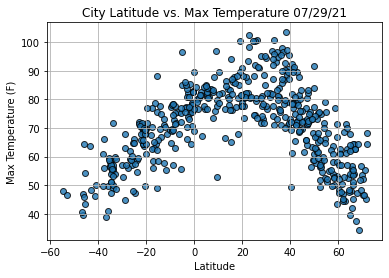

In [16]:
# Import time module
import time

max_temps
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

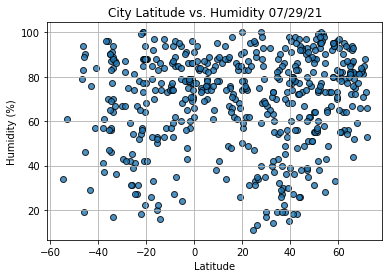

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [26]:
# Import linregress - already called in the first cell of the notebook
# from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# not sure what the text_coordinates do for example (40,10) for the northern hemisphere ? ? ?
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Alegrete
Country                        BR
Date          2021-07-29 18:39:34
Lat                      -29.7831
Lng                      -55.7919
Max Temp                    52.79
Humidity                       43
Cloudiness                      5
Wind Speed                   6.85
Name: 13, dtype: object

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
      
n_lats = northern_hemi_df["Lat"]
s_lats = southern_hemi_df["Lat"]
print(len(n_lats), len(s_lats))

340 171


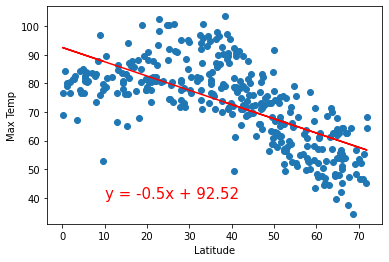

In [27]:
# Looking at the plot I think there would be a better fit line if we only looked at values north of 20 degrees lat

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

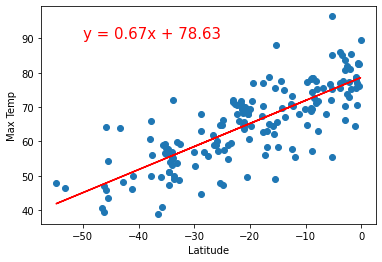

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

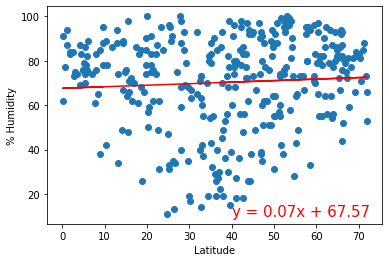

In [32]:
# My guess is there should be NO CORRELATION or very week which means the "R-value" will be lower?
# How do we look up the r-value again? 
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

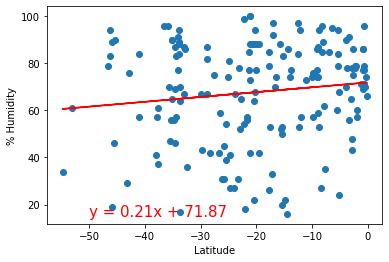

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
# plot_linear_regression(x_values, y_values,
#                       'Linear Regression on the Southern Hemisphere \ 
#                       for % Humidity', '% Humidity',(-50,15))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for percent humidity', '% Humidity',(-50,15))                   
# getting an unusual error on this one - it was copied from the course material just like the previous cell 

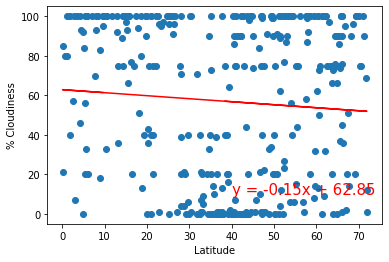

In [43]:
# Linear regression on the Northern Hemisphere for Cloudiness- DIY yeah baby behave

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

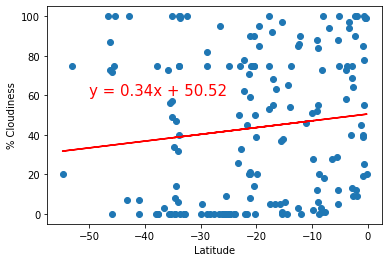

In [46]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))